# **Módulo 45 - Introducción al Clustering**

En este módulo, exploraremos el Clustering, una técnica de aprendizaje no supervisada en Machine Learning. Nos enfocaremos en el algoritmo K-means  y aprenderemos a agrupar datos complejos para descubrir patrones ocultos sin intervención humana directa. A continuación, se destacan los temas que abordaremos:

- ## **Algoritmo K-means**

Nos adentraremos en el funcionamiento del algoritmo k-means, que selecciona centros de datos aleatorios y ajusta estos centros iterativamente hasta estabilizar los grupos. Aprenderemos a utilizar gráficos de codo y el score de silueta para determinar el número óptimo de clusters.

- ## **Preparación de Datos**

Discutiremos la importancia de preparar adecuadamente los datos para el Clustering. Esto incluye la limpieza de la base de datos, la detección de multicolinealidad y la normalización de variables mediante Z-score para evitar el overfitting. 

- ## **Implementación Práctica**

Utilizaremos Python y librerías como Pandas, NumPy, Seaborn, Matplotlib y Scikit-learn para implementar y evaluar modelos de Clustering. Realizaremos un análisis exploratorio de datos y visualizaremos los **clusters** utilizando scatterplot y dendogramas.

____

# **Clustering**

El clustering es una técnica que nos permite agrupar un conjunto de datos con muchas diferentes variables que lo perfilan de manera automática, sin una previa selección.

Por ejemplo, a la música la puedo clasificar por género, por idioma, por tempo, lo que convertiría este ejercicio en un aprendizaje supervisado, una clasificación.

En este caso, se habla de una técnica que permite automáticamente clasificar los registros de una base de datos sin una clasificación previa.

La idea es justamente armas grupos similares, basados en todos sus atributos, en un índice de similaridad. Este índice es justamente lo que el clustering hace muy bien.

## **Aplicaciones de Clustering**

- Análisis de clientes.
- Detección de anomalías.
- Agrupamiento de resultados de búsqueda.
- Agrupaciones de comportamiento.
- Seguimiento de campañas de marketing.

## **Algoritmo k-means**

- Es el más utilizado para Clustering.
- Basado en Centroides. Es eficiente, efectivo y simple.
- Es sensible al punto de partida inicial.

## **Funciona así**
- El analista debe seleccionar el número de clusters.
- En la iteración #1 se escogen 3 puntos random como los centroides del grupo.
- Para cada punto de los datos, se asigna un centroide, según la distancia euclidiana.
- Se re-calculan  los centroides ahora utilizando los clusters definidos.
- Se repiten los pasos 3 y 4 hasta que los centroides convergen en sus coordenadas (casi no se mueven).


____

# **Importación de Librerías**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import single, cophenet
from scipy.spatial.distance import pdist, squareform

# **Exploratory Data Analysis**

In [2]:
os.chdir(r'C:\Users\danielortega\OneDrive - HOTELERA YALKUITO SA DE CV\Desktop\No Borrar Daniel\30 Data Analyst - Curso\51_Módulo_45_Introducción_Clustering\Modulo_45_Introduccion_al_Clustering')

columnas = ['class', 'Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue', '0D280_0D315_of_diluted_wines', 'Proline']
df = pd.read_csv(r'C:\Users\danielortega\OneDrive - HOTELERA YALKUITO SA DE CV\Desktop\No Borrar Daniel\30 Data Analyst - Curso\51_Módulo_45_Introducción_Clustering\Modulo_45_Introduccion_al_Clustering\wine.data', header=None, names=columnas)

df.sample(3)

,class,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
107,2,12.72,1.75,2.28,22.5,84,1.38,1.76,0.48,1.63,3.3,0.88,2.42,488
36,1,13.28,1.64,2.84,15.5,110,2.60,2.68,0.34,1.36,4.6,1.09,2.78,880
17,1,13.83,1.57,2.62,20.0,115,2.95,3.40,0.40,1.72,6.6,1.13,2.57,1130


In [3]:
df.shape

(178, 14)

In [4]:
df.dtypes

class                             int64
Alcohol                         float64
Malicacid                       float64
Ash                             float64
Alcalinity_of_ash               float64
Magnesium                         int64
Total_phenols                   float64
Flavanoids                      float64
Nonflavanoid_phenols            float64
Proanthocyanins                 float64
Color_intensity                 float64
Hue                             float64
0D280_0D315_of_diluted_wines    float64
Proline                           int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malicacid                     178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity_of_ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total_phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid_phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color_intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  0D280_0D315_of_diluted_wines  178 non-null    float64
 13  Proli

## **Primeros Insights**

- Se tienen 178 filas y 14 campos. No es un DataSet grande.
- No existe necesidad de una variable de predicción, ya que el proceso de clustering agrupa a los registros según sus features.
- Este DataSet ya tiene una columna de categoría que vamos a eliminar para que no influya en el Clustering realizado por el modelo.

In [6]:
df.drop('class', axis='columns', inplace=True)

In [7]:
df.sample(3)

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
109,11.61,1.35,2.70,20.0,94,2.74,2.92,0.29,2.49,2.65,0.96,3.26,680
139,12.84,2.96,2.61,24.0,101,2.32,0.60,0.53,0.81,4.92,0.89,2.15,590
81,12.72,1.81,2.20,18.8,86,2.20,2.53,0.26,1.77,3.90,1.16,3.14,714


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malicacid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [9]:
df[df==0].count() / df.count()

Alcohol                         0.0
Malicacid                       0.0
Ash                             0.0
Alcalinity_of_ash               0.0
Magnesium                       0.0
Total_phenols                   0.0
Flavanoids                      0.0
Nonflavanoid_phenols            0.0
Proanthocyanins                 0.0
Color_intensity                 0.0
Hue                             0.0
0D280_0D315_of_diluted_wines    0.0
Proline                         0.0
dtype: float64

In [10]:
df.nunique()

Alcohol                         126
Malicacid                       133
Ash                              79
Alcalinity_of_ash                63
Magnesium                        53
Total_phenols                    97
Flavanoids                      132
Nonflavanoid_phenols             39
Proanthocyanins                 101
Color_intensity                 132
Hue                              78
0D280_0D315_of_diluted_wines    122
Proline                         121
dtype: int64

In [11]:
df.isnull().sum()

Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
dtype: int64

In [12]:
df[df.duplicated()]

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline


## **Insights**

- No tenemos valores duplicados.
- No tenemos valores en ceros.
- Tenemos dos columnas que tienen una dimensión de valores muy diferente a las demás.

___

# **Análisis de Correlación y Bivariado**

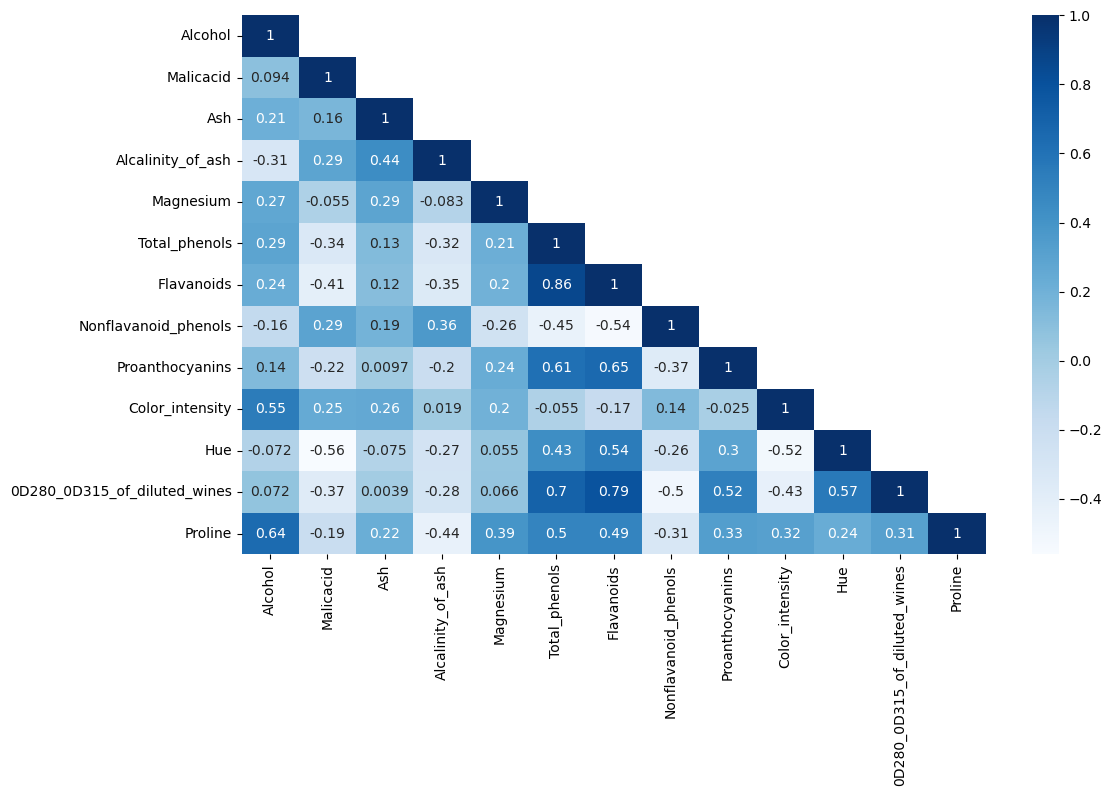

In [13]:
df_num = df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 7))
corr_df = corr = df_num.corr(method='pearson')
df_lt = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(bool))
hmap = sns.heatmap(df_lt, cmap='Blues', annot=True)

In [14]:
cols_num = df_num.columns
cols_num

Index(['Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
       'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       '0D280_0D315_of_diluted_wines', 'Proline'],
      dtype='object')

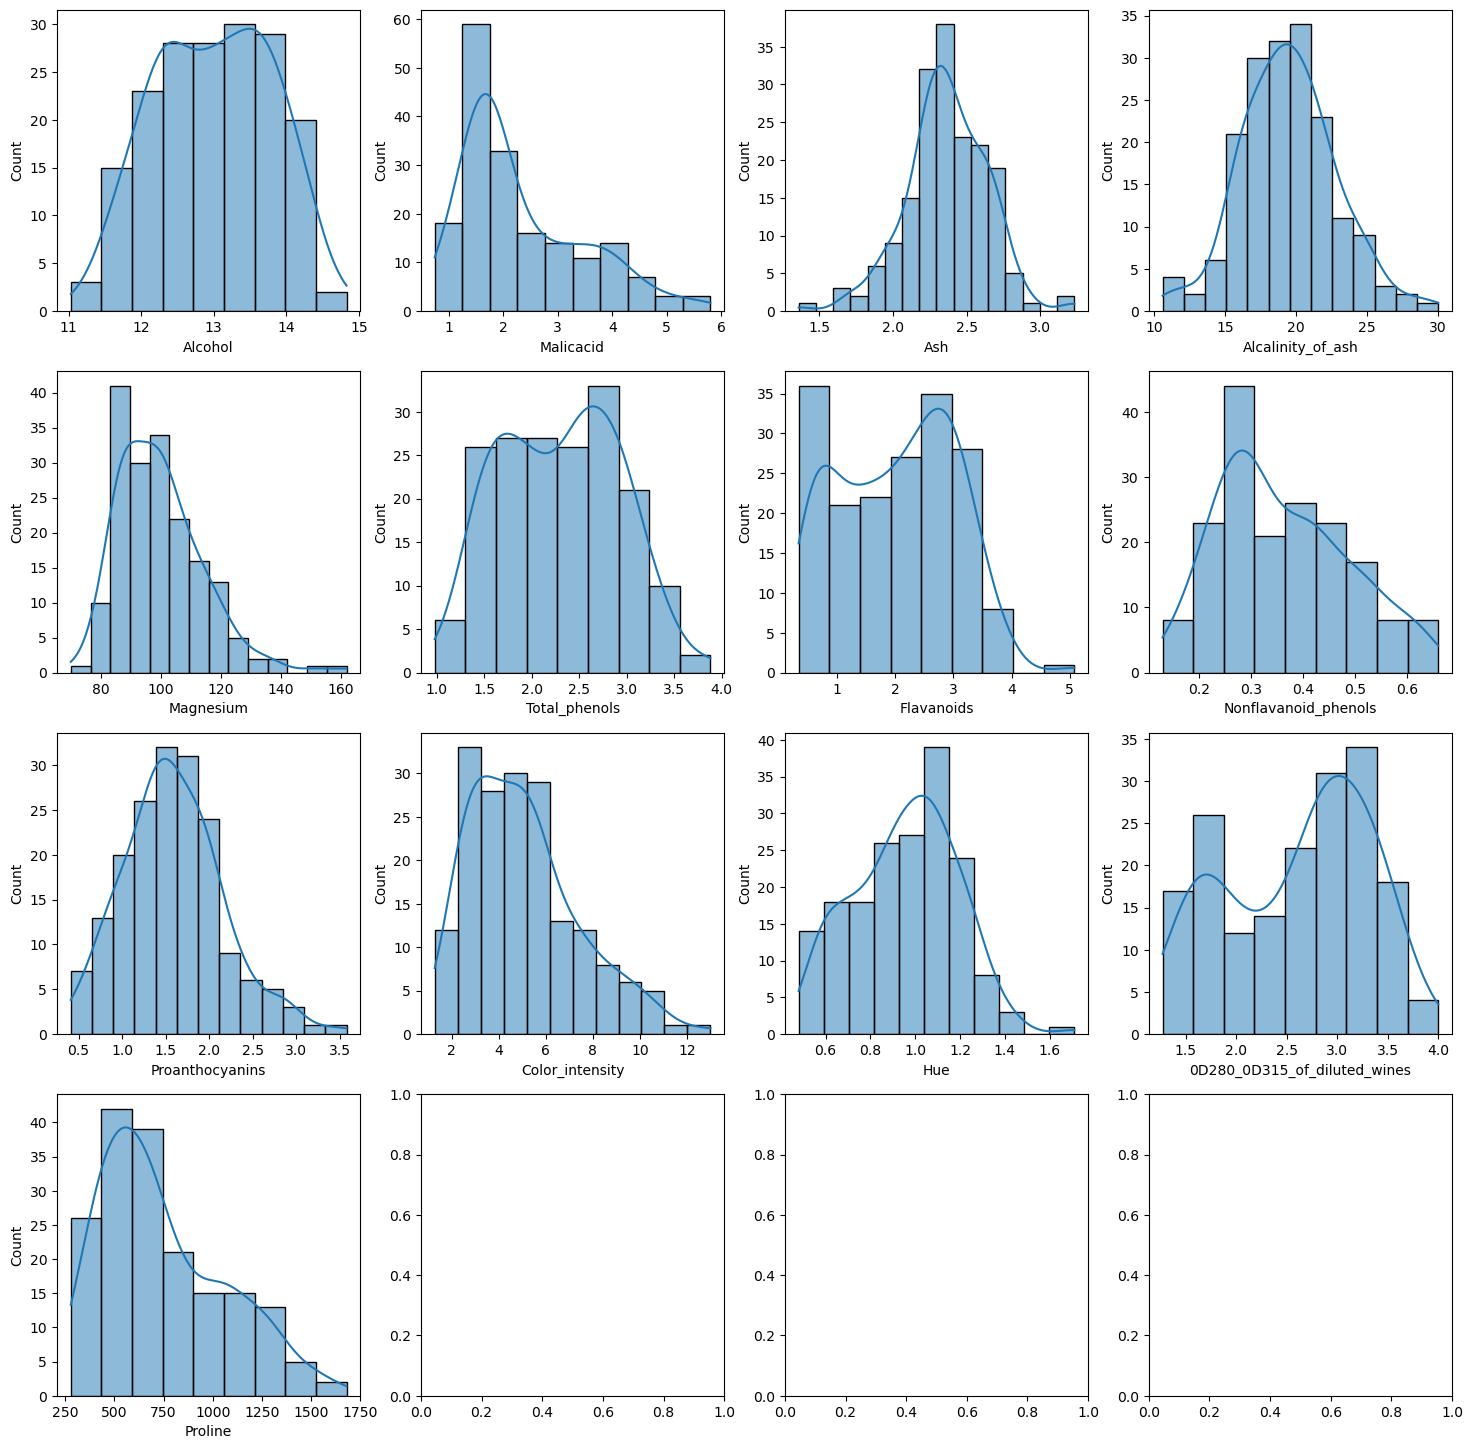

In [15]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18,18))
for i, column in enumerate(cols_num):
    sns.histplot(df[column], ax=axes [i//4, i%4], kde=True)

Text(0.5, 1.0, 'Box_plot de Variables')

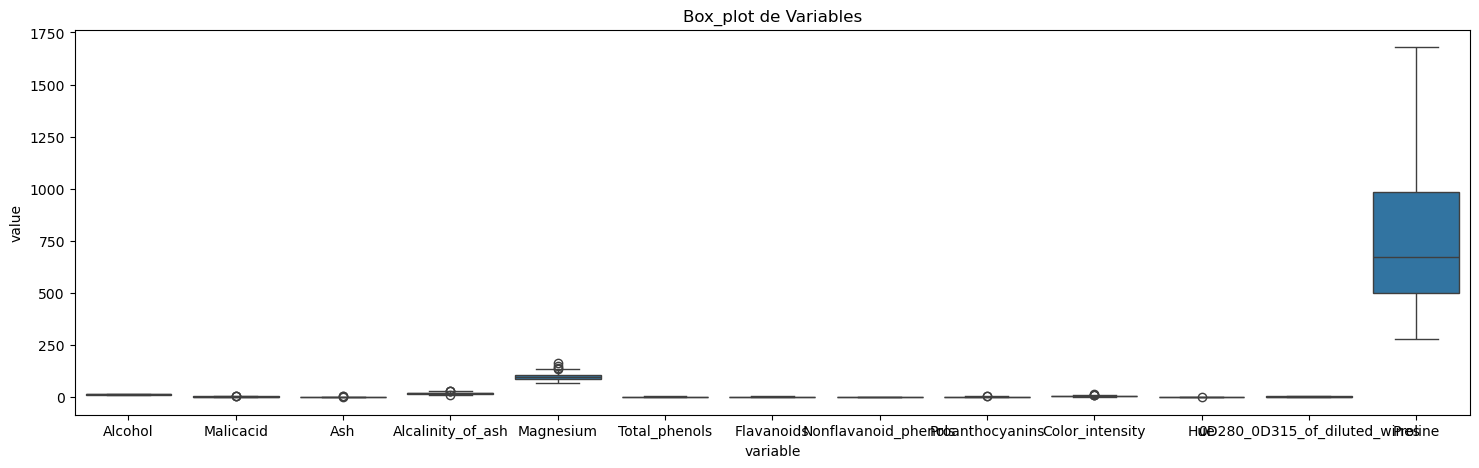

In [16]:
plt.figure(figsize=(18,5))
sns.boxplot(x='variable', y='value', data=pd.melt(df[cols_num])).set_title('Box_plot de Variables')

## **Insights**

- No se ve ninguna columnas con outliers.
- El rango de la columna de Proline debería normalizarse.
- Las demás variables no requieren ninguna transformación.
____

# **Feature Engineering**

In [17]:
df2 = df.copy()

In [18]:
df3 = df.copy()

In [19]:
from scipy.stats import pearsonr

def reg_coef(x, y, label=None, color=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5, 0.5), xycoords='axes fraction', ha='center', fontsize=15)
    ax.set_axis_off()

Text(0.5, 0.98, 'Análisis de correlación')

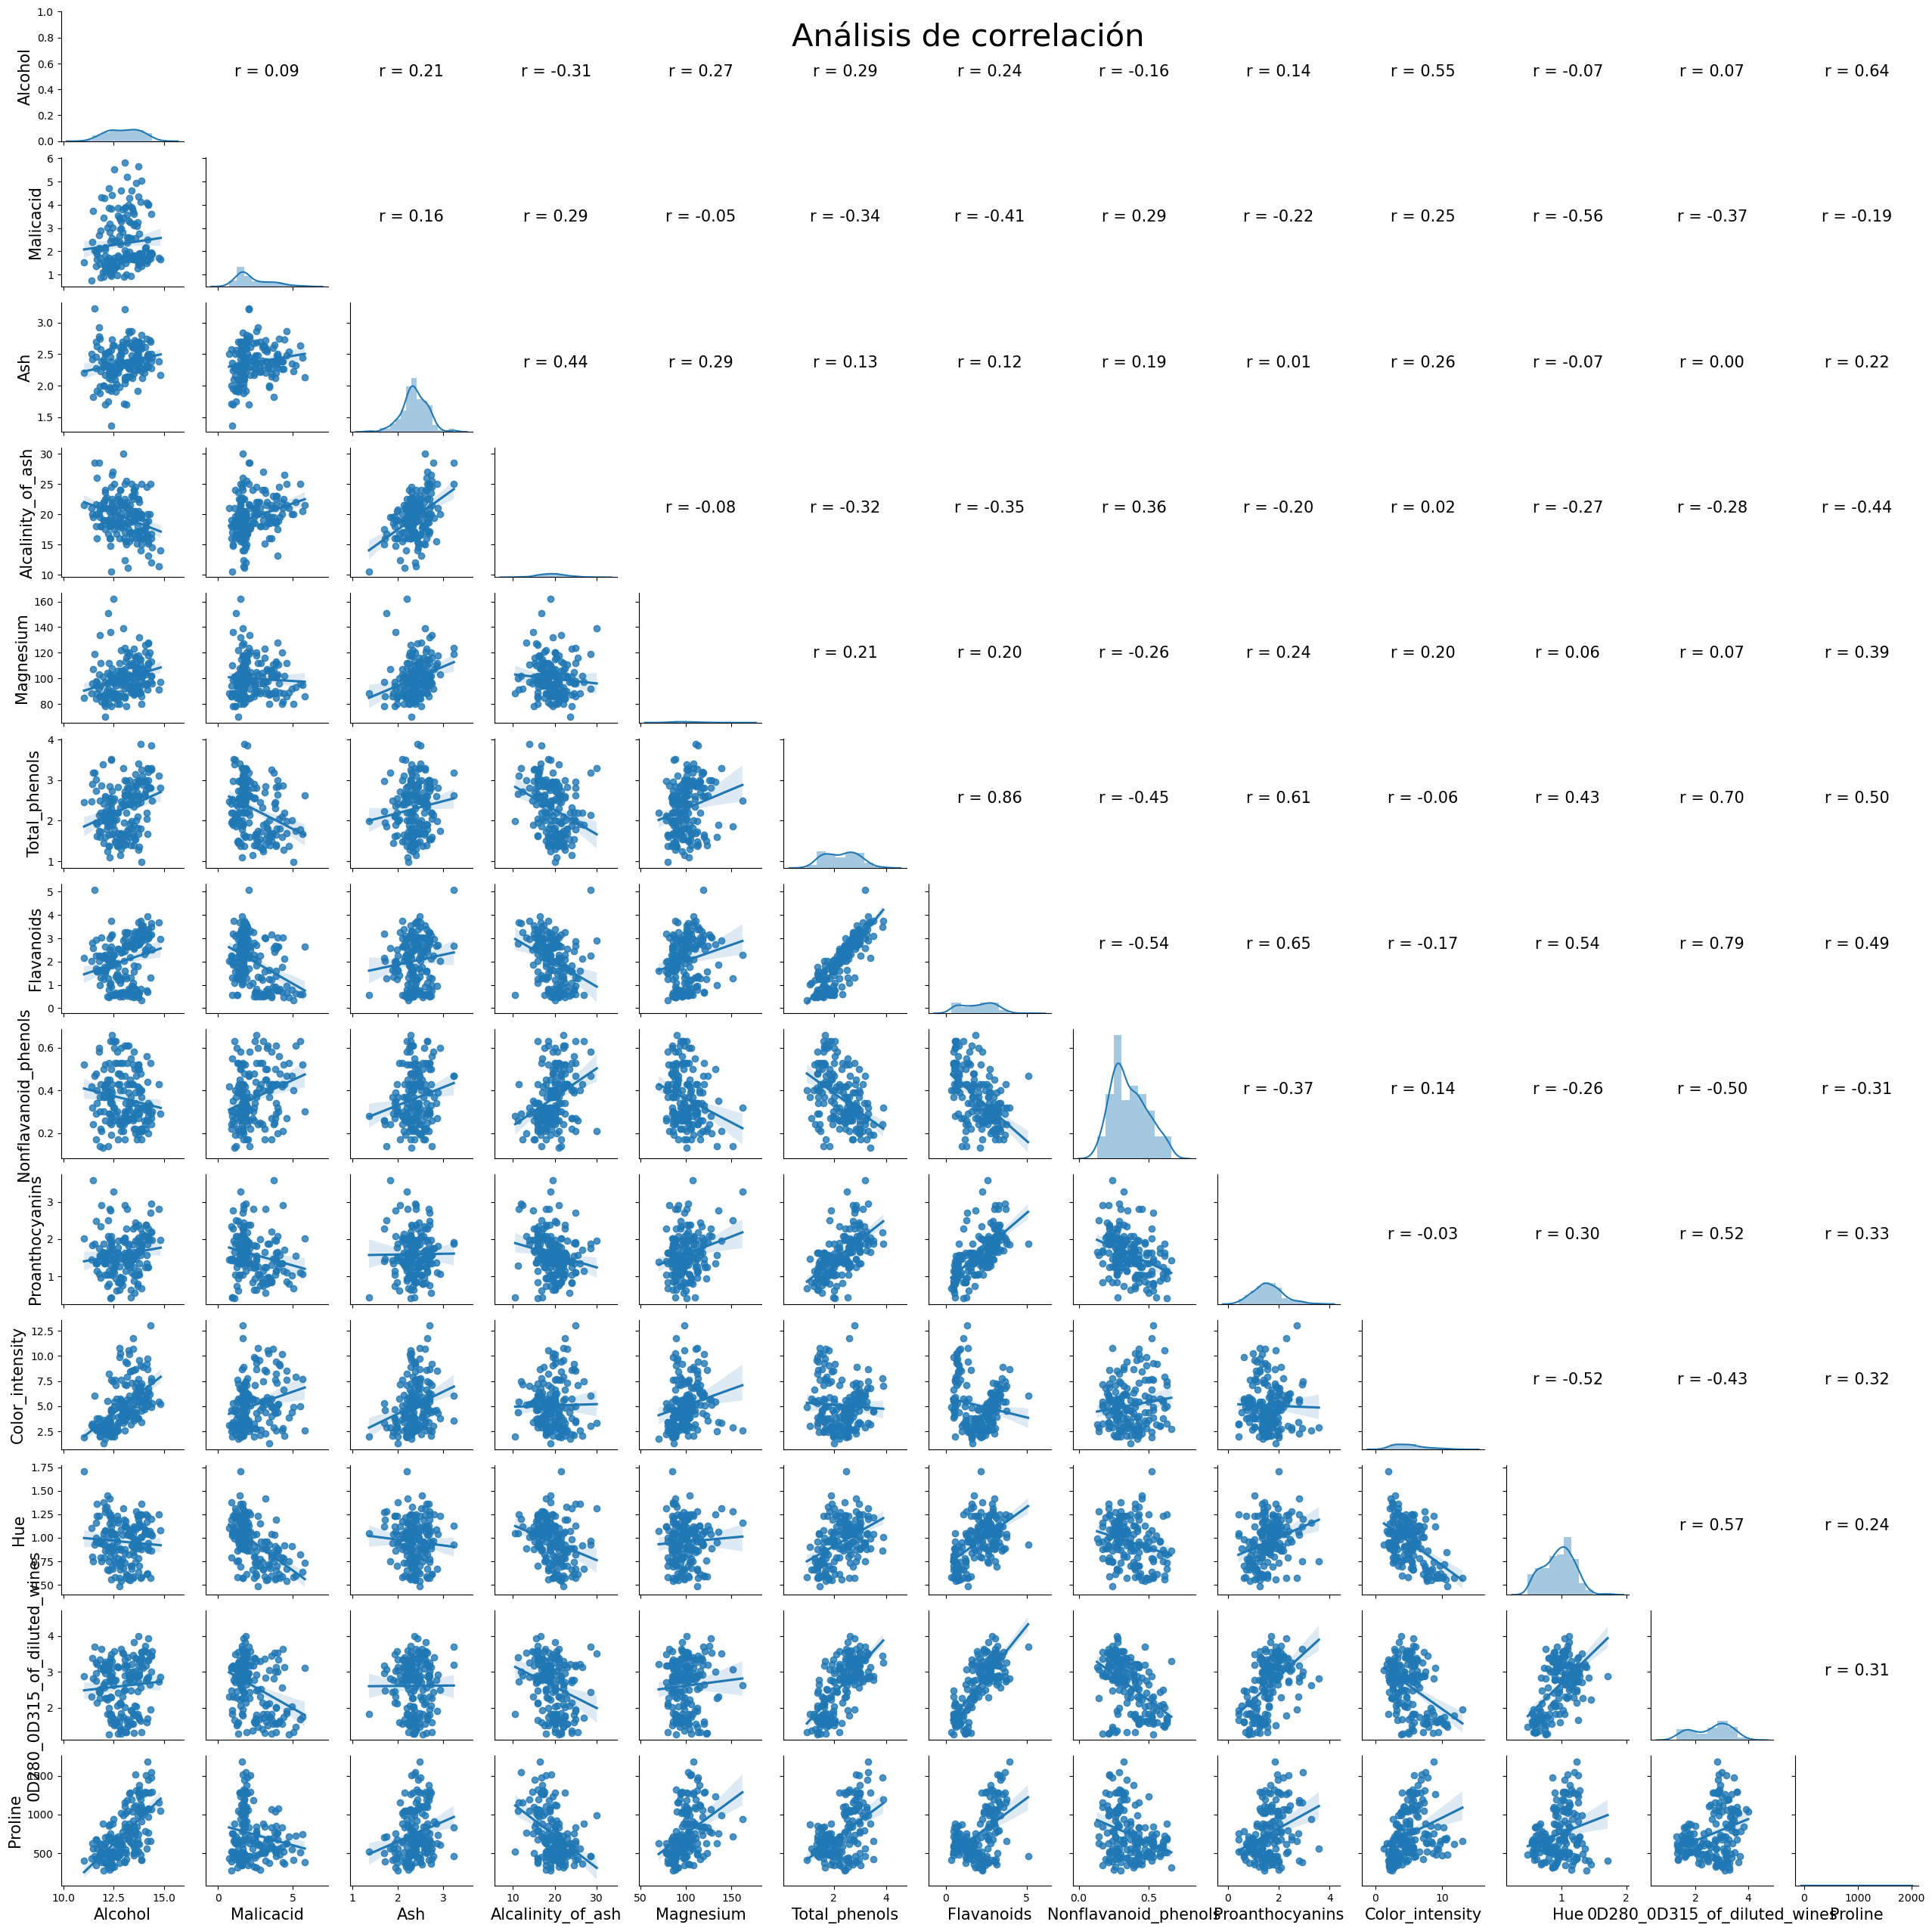

In [20]:
import matplotlib as mpl
mpl.rcParams['axes.labelsize']=15
g = sns.PairGrid(df2, height=2)
g.map_diag(sns.distplot)
g.map_lower(sns.regplot)
g.map_upper(reg_coef, fontsize=20, cmap=plt.get('GnBu'))
g.fig.suptitle('Análisis de correlación', fontsize=30)

# **Escalamiento**

In [21]:
from scipy.stats import zscore
df2 = df2.apply(zscore)

In [22]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,-8.382808e-16,1.002821,-2.434235,-0.788245,0.061000,0.836129,2.259772
Malicacid,178.0,-1.197544e-16,1.002821,-1.432983,-0.658749,-0.423112,0.669793,3.109192
Ash,178.0,-8.370333e-16,1.002821,-3.679162,-0.572122,-0.023821,0.698109,3.156325
Alcalinity_of_ash,178.0,-3.991813e-17,1.002821,-2.671018,-0.689137,0.001518,0.602088,3.154511
Magnesium,178.0,-3.991813e-17,1.002821,-2.088255,-0.824415,-0.122282,0.509638,4.371372
Total_phenols,178.0,0.000000e+00,1.002821,-2.107246,-0.885468,0.095960,0.808997,2.539515
Flavanoids,178.0,-3.991813e-16,1.002821,-1.695971,-0.827539,0.106150,0.849085,3.062832
Nonflavanoid_phenols,178.0,3.592632e-16,1.002821,-1.868234,-0.740141,-0.176095,0.609541,2.402403
Proanthocyanins,178.0,-1.197544e-16,1.002821,-2.069034,-0.597284,-0.062898,0.629175,3.485073
Color_intensity,178.0,2.494883e-17,1.002821,-1.634288,-0.795103,-0.159225,0.493956,3.435432


## **Insights**

- Log Transformation - no necesario.
- Column Dropping - no necesario.
- Escalamiento

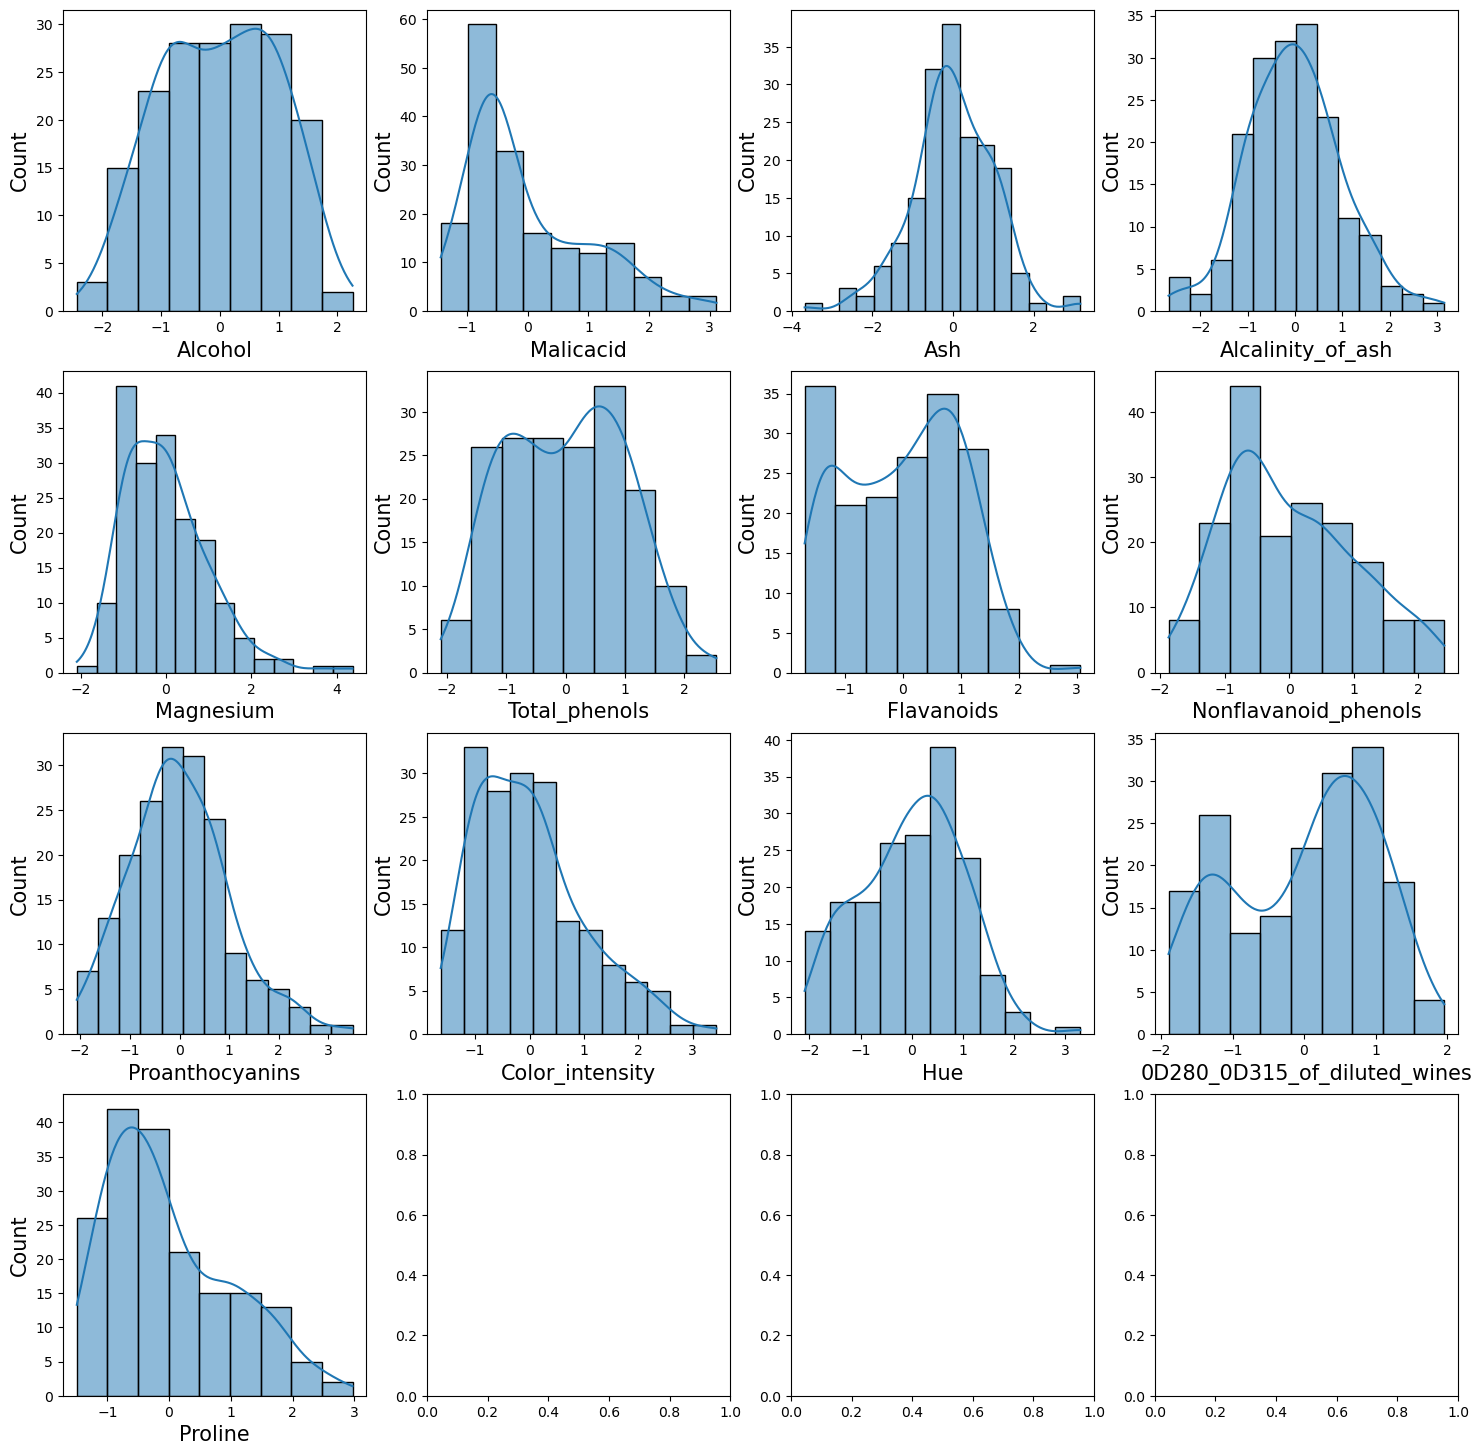

In [23]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18,18))
for i, column in enumerate(cols_num):
    sns.histplot(df2[column], ax=axes [i//4, i%4], kde=True)

___
# **Modelo de Clustering**


In [24]:
from scipy.spatial.distance import cdist
clusters = range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df2)
    prediction=model.predict(df2)
    meanDistortions.append(sum(np.min(cdist(df2, model.cluster_centers_, 'euclidean'), axis=1)) /df2.shape[0])


Text(0.5, 1.0, 'Resultados Kmeans')

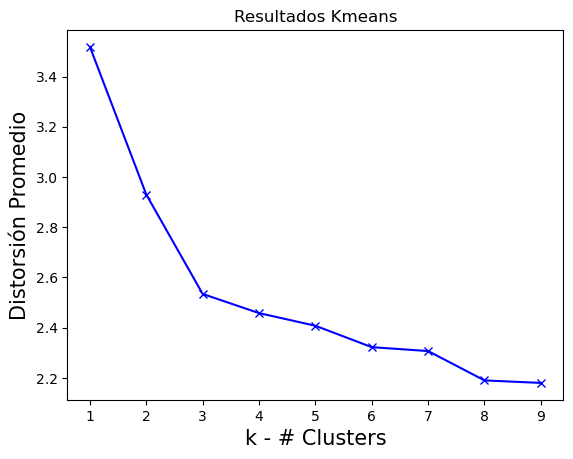

In [25]:
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k - # Clusters')
plt.ylabel('Distorsión Promedio')
plt.title('Resultados Kmeans')

## **Insights**

- Por inspección visual, un número de 3 clusters parece el indicado y donde se forma el 'codo' en el gráfico.
- Se hizo una análisis entre 1 a 9 clusters.

Se genera el número de clusters = 3
El parámetro n_init significa que se probarán 15 diferentes inicializaciones y se tomarán las mejores

In [26]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=1)
kmeans.fit(df2)

KMeans(n_clusters=3, n_init=15, random_state=1)

Se pueden ver las coordenadas de los centroides para cada variable

In [27]:
centroids = kmeans.cluster_centers_
centroids

array([[ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529],
       [ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796],
       [-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618]])

Se mapea ahora los centroides con la lista de elementos

In [28]:
centroids_df = pd.DataFrame(centroids, columns=list(df2))
centroids_df

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,0.835232,-0.303810,0.364706,-0.610191,0.577587,0.885237,0.977820,-0.562090,0.580287,0.171063,0.473984,0.779247,1.125185
1,0.164907,0.871547,0.186898,0.524367,-0.075473,-0.979330,-1.215248,0.726064,-0.779706,0.941539,-1.164789,-1.292412,-0.407088
2,-0.926072,-0.394042,-0.494517,0.170602,-0.491712,-0.075983,0.020813,-0.033534,0.058266,-0.901914,0.461804,0.270764,-0.753846


Se genera un DataFrame para los labels de los clusters y se los convierte en categorías. Así, cada registro tiene su cluster asociado

In [29]:
df_labels = pd.DataFrame(kmeans.labels_ , columns= list(['labels']))
df_labels['labels'] = df_labels['labels'].astype('category')

Hace un unión del DataFrame de las etiquetas con el de datos

In [30]:
df_labeled = df3.join(df_labels)

In [31]:
df_labeled.columns

Index(['Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
       'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       '0D280_0D315_of_diluted_wines', 'Proline', 'labels'],
      dtype='object')

df_labeled tiene las variables utilizadas en el proceso de clustering

In [32]:
df_labeled.sample(3)

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,labels
170,12.20,3.03,2.32,19.0,96,1.25,0.49,0.40,0.73,5.50,0.66,1.83,510,1
64,12.17,1.45,2.53,19.0,104,1.89,1.75,0.45,1.03,2.95,1.45,2.23,355,2
120,11.45,2.40,2.42,20.0,96,2.90,2.79,0.32,1.83,3.25,0.80,3.39,625,2


División de los clusters


In [33]:
df_labeled['labels'].value_counts()

labels
2    65
0    62
1    51
Name: count, dtype: int64

Gráfico de Clusters por Registro

Text(0.5, 1.0, 'Kmeans')

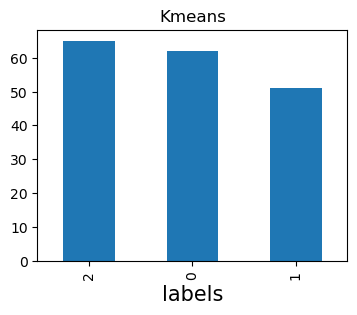

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(4,3))
pd.value_counts(df_labeled['labels']).plot(kind='bar').set_title('Kmeans')

Gráfico de Clases

Text(0.5, 0.98, 'Configuración de Clusters por Variable Kmeans')

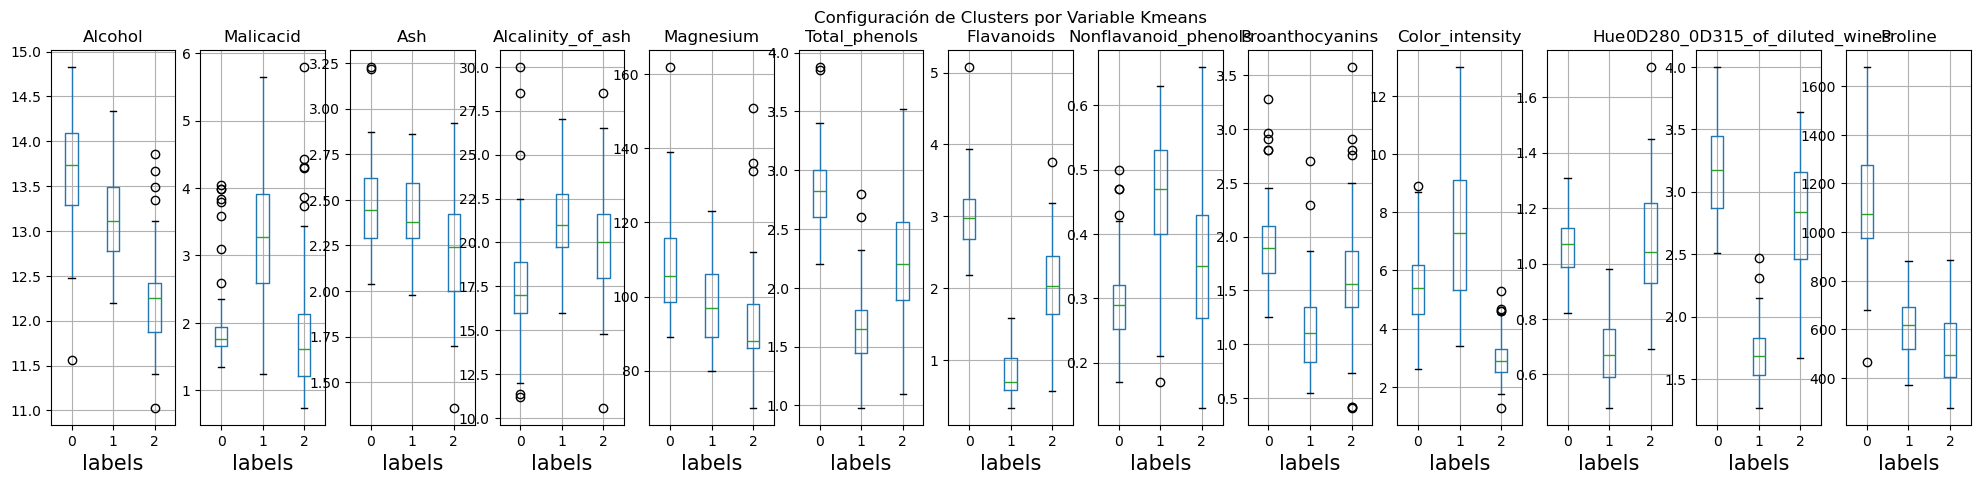

In [35]:
fig, ax = plt.subplots(1,13,figsize=(24,5))
df_labeled.boxplot('Alcohol','labels', ax=ax[0])
df_labeled.boxplot('Malicacid','labels', ax=ax[1])
df_labeled.boxplot('Ash','labels', ax=ax[2])
df_labeled.boxplot('Alcalinity_of_ash','labels', ax=ax[3])
df_labeled.boxplot('Magnesium','labels', ax=ax[4])
df_labeled.boxplot('Total_phenols','labels', ax=ax[5])
df_labeled.boxplot('Flavanoids','labels', ax=ax[6])
df_labeled.boxplot('Nonflavanoid_phenols','labels', ax=ax[7])
df_labeled.boxplot('Proanthocyanins','labels', ax=ax[8])
df_labeled.boxplot('Color_intensity','labels', ax=ax[9])
df_labeled.boxplot('Hue','labels', ax=ax[10])
df_labeled.boxplot('0D280_0D315_of_diluted_wines','labels', ax=ax[11])
df_labeled.boxplot('Proline','labels', ax=ax[12])
fig.suptitle('Configuración de Clusters por Variable Kmeans')


Gráfico de los Clusters

Para generar este gráfico elegimos variables que tengan mucha diferencia entre los mismos

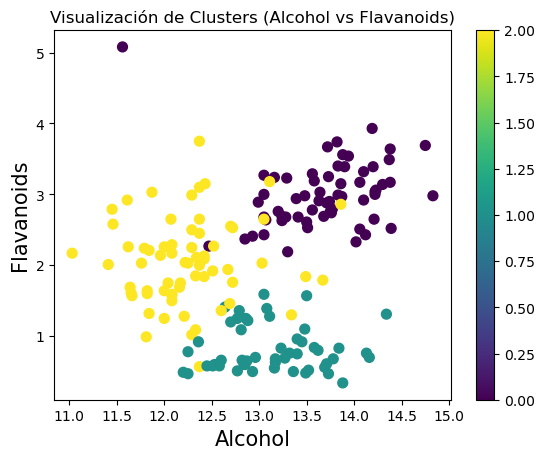

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df_labeled['Alcohol'], df_labeled['Flavanoids'], c=df_labeled['labels'], s=50)
ax.set_title('Visualización de Clusters (Alcohol vs Flavanoids)')
ax.set_xlabel('Alcohol')
ax.set_ylabel('Flavanoids')
plt.colorbar(scatter)

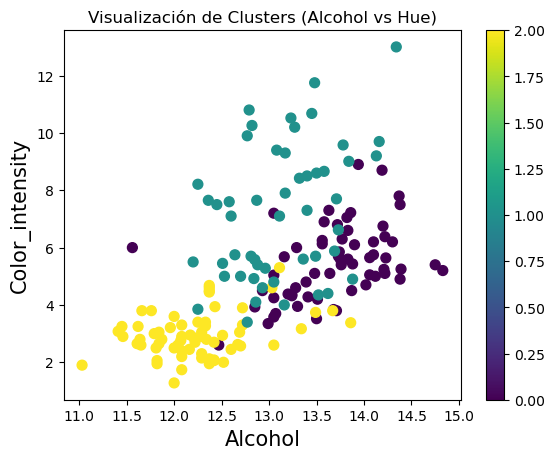

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df_labeled['Alcohol'], df_labeled['Color_intensity'], c=df_labeled['labels'], s=50)
ax.set_title('Visualización de Clusters (Alcohol vs Hue)')
ax.set_xlabel('Alcohol')
ax.set_ylabel('Color_intensity') 
plt.colorbar(scatter)

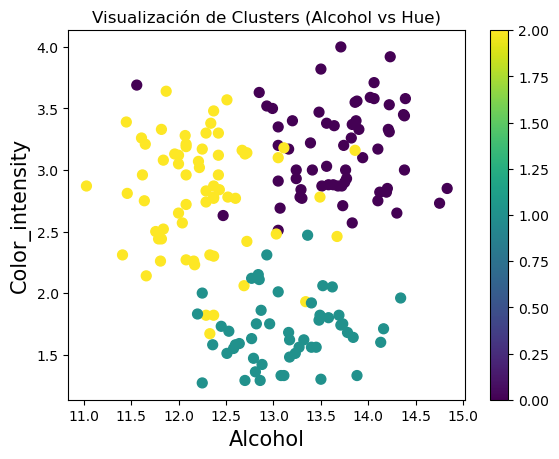

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df_labeled['Alcohol'], df_labeled['0D280_0D315_of_diluted_wines'], c=df_labeled['labels'], s=50)
ax.set_title('Visualización de Clusters (Alcohol vs Hue)')
ax.set_xlabel('Alcohol')
ax.set_ylabel('Color_intensity') 
plt.colorbar(scatter)

## **Insights**

- Se puede ver claramente cómo se arman los clusters, más intensamente divididos en los grupos que tienen mayor varianza o división entre sus columnas

____

# **Hierarchical Clustering**

- Se ejecuta un método llamado Clustering Jerárquico, que divide en un 'dendograma' a los datos.
- Además, se genera el concepto del indice cofenético, para ver cuál es el óptimo número de clusters

### Usando Ward + Distancia Euclidiana

Se genera la matriz de enlaces

In [40]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(df2, 'average', metric='euclidean')
Z.shape

(177, 4)

Generamos dendrograma

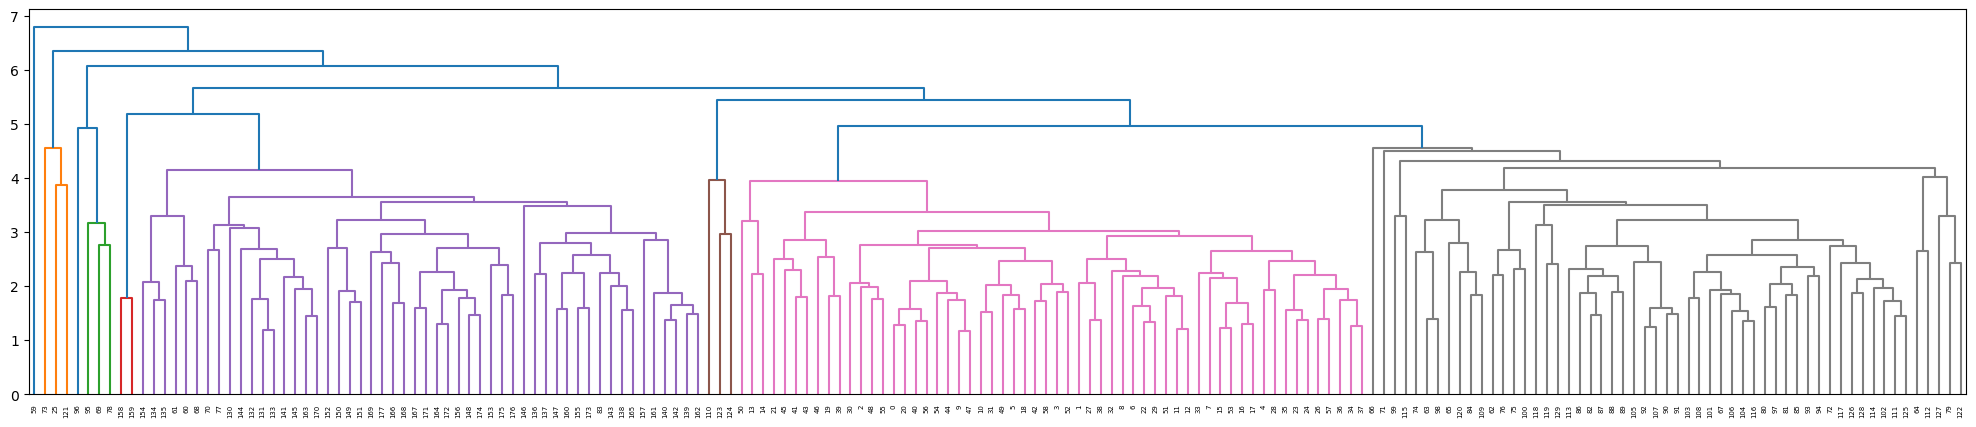

In [41]:
plt.figure(figsize=(25,5))
dendrogram(Z)
plt.show()

Se calcula el Coeficiente Cofenético para validar la calidad del fit del dendograma con los pares de datos 

> **El máximo del coeficiente es 1**

In [50]:
c, coph_dists = cophenet(Z, pdist(df2))
print('El coeficiente cofenético es:', format(c, '.4f'))

El coeficiente cofenético es: 0.7591


## Silhouette Score

- Se calcula el silhouette score para el modelo.
- Se prueba este score con un rango de 2 a 10 clusters, buscando el npumero de clusters donde se produzca el peak score.
- Este peak indica cuál es el número óptimo de clusters.

In [51]:
sil_df = pd.DataFrame({}, columns=['Model', 'n_clusters', 'score'], index=None)

In [52]:
from sklearn.metrics import silhouette_score
import pandas as pd
from sklearn.cluster import KMeans

results = []

clusters = range(2, 11)
for n_clusters in clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict(df2)
    centers = clusterer.cluster_centers_

    score = silhouette_score(df2, clusterer.labels_, metric='euclidean')

    results.append({'Model': 'KMeans', 'n_clusters': n_clusters, 'score': score})

# Convertir lista a DataFrame al final
sil_df = pd.DataFrame(results)

print(sil_df)

    Model  n_clusters     score
0  KMeans           2  0.268313
1  KMeans           3  0.285942
2  KMeans           4  0.255582
3  KMeans           5  0.240435
4  KMeans           6  0.230519
5  KMeans           7  0.190411
6  KMeans           8  0.129437
7  KMeans           9  0.132784
8  KMeans          10  0.136933


Text(0.5, 1.0, 'Silhouette Score')

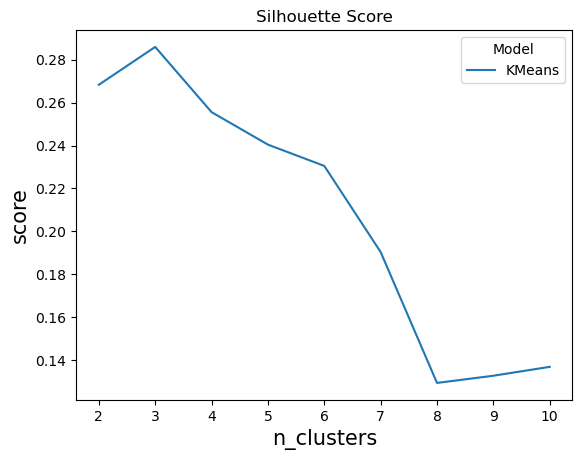

In [53]:
sns.lineplot(data=sil_df, x='n_clusters', y='score', hue='Model', style='Model', ci=None).set_title('Silhouette Score')

## **Main Insights**

- Se confirma con el Silhouette Score que con k=3 se tiene el mejor desempeño.

# **GLOSARIO**

- **Clustering Jerárquico**

Un método de agrupamiento que construye una jerarquía de clusters, representada a menudo mediante un dendograma, que muestra cómo los clusters se dividen o se combinan en diferentes niveles de similitud.

- **Dendograma**

Una representación gráfica en forma de árbol que ilustra la disposición de los clusters producidos por el clustering jerárquico, mostrando las relaciones de similitud entre los datos.

- **Elbow Method**

Una técnica utilizada para determinar el número óptimo de clusters en un conjunto de datos, identificando el punto dónde la varianza explicada comienza a disminuir significativamente. 

- **Escalamiento Z-Score**

Un método de normalización de datos que tranforma las variables para que tengan una media de cero y una desviación estándar de uno, ayudando a evitar el overfitting en modelos de cluster.

- **K-means**

Un algoritmo de clustering que particiona un conjunto de datos en K grupos, asignando cada punto al cluster con el centroide más cercano y ajustando iterativamente los centroides hasta que los clusters se estabilicen.

- **PairPlot**

Una visualización que muestra relaciones entre pares de variables en un conjunto de datos, útil para identificar correlaciones y patrones antes de aplicar técnicas de clustering.

- **Score de Silueta**

Una métrica utilizada para evaluar la calidad de los clusters formados, midiendo qué tan cerca están los puntos dentro de un cluster y qué tan separados están de otros clusters.